<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions18_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="25intro">7.1 Linear Regression</a>

---

In linear regression we are modeling a variable, y, relative to a predictor variable (or variables): $x_1$, $x_2$, etc.  The variable y is a continuous variable that is normally descributed.  The predictor variables can either be continuous or categorical variables.  Taking the simple example of two continuous variables: x and y, the linear model can be described as:

$$y = \alpha + \beta x$$

$y = E(y|x)$ is the expected (or average) value of $y$ for a given value of $x$.

-  $x$ is the <font color="tomato"> predictor variable or independent variable </font>
-  $y$ is the <font color="mediumseagreen">response variable or dependent variable</font>

In this section, we will learn more about linear models and how to make statistical inferences about our fits to the model.


## <a name="71q1"> Question 1</a>

---

A study was conducted to determine if there is a relationship between birthweight and estriol level in pregnant women.  The study measured this in 31 participants.  Let y = birthweight and x = estriol level.  Load the study data and make a scatter plot with labels (Hint: Use the plot command).  Do you think a linear fit would work for this data?

### <a name="25sol1">Solution to  Question 1</a>

---

The data has a lot of variation but seems to follow a linear trend.
<br>

In [1]:
#Load in dataset
estriol <- read.csv("https://raw.githubusercontent.com/gibsonea/Biostats/main/Datasets/Estriol.csv")
str(estriol)

'data.frame':	32 obs. of  3 variables:
 $ Patient.ID : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Estriol    : int  7 9 9 12 14 16 16 14 16 16 ...
 $ Birthweight: int  25 25 25 27 27 27 24 30 30 31 ...


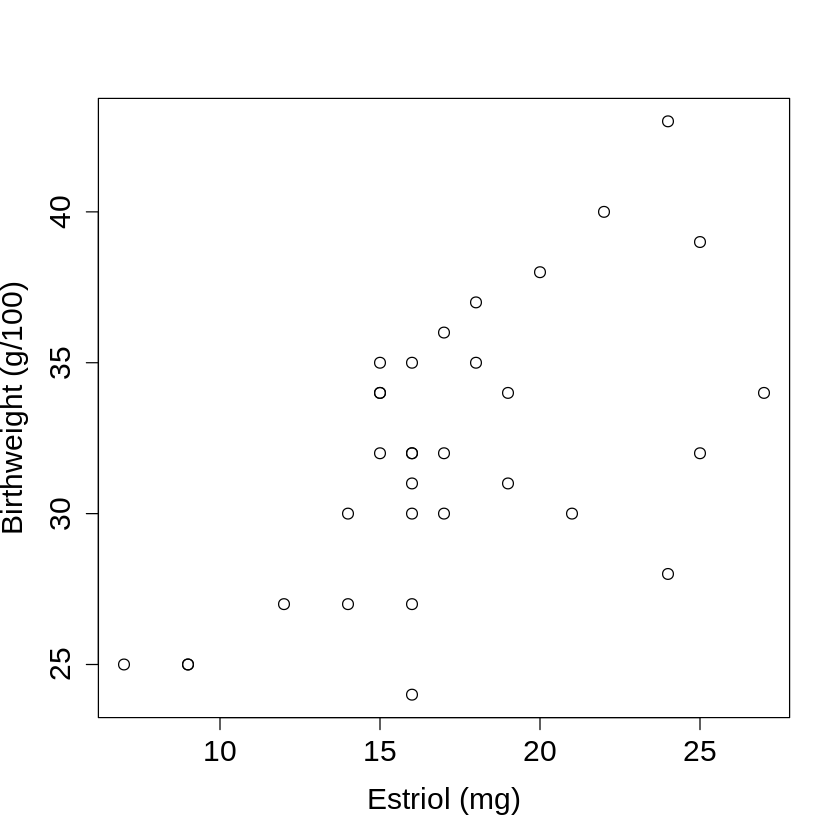

In [2]:
#code cell for Question 1


plot(estriol$Estriol,estriol$Birthweight, xlab = 'Estriol (mg)', ylab = 'Birthweight (g/100)' ,
cex = 1.2, cex.lab=1.5, cex.axis=1.5)



# <a name="leastsq">Method of Least Squares</a>

---

Given some sampled data $(x, y)$, we can use the method of least squares to fit a regression line: $y = a + b x$ and find our model parameters, $a$ and $b$.


We want to find a line that would best fit this data.  How do we do that?  Assume we draw a line with coefficients a and b corresponding to the intercept and slope: $y = a + b x$.  

For each data point $(x_i,y_i)$ we can express $y_i$ as:

$$y_i = a + b x_i + d_i$$

where $a + b x_i$ is the point on the regression line at $x_i$, and $d_i$ is the displacement of $y_i$ from the regression line as shown in the plot below.

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/RegressionLine.png" width="600">


To find the best fit, we want to find the values of our coefficients, a and b, that minimizes the displacements from the line to each of the data points, $d_i$.  To do this, we will take the sum over all the datapoints of the square of the displacements and minimize this with respect to a and b.

$$\sum_{i=1}^{n} {d_i}^2 = \sum_{i=1}^{n} (a + b x_i - y_i)^2 $$

To minimize, we take the derivative and set it equal to zero.

$$ \frac {\partial \sum{d_i}^2}{\partial a} = 0$$
$$ \frac {\partial \sum{d_i}^2}{\partial b} = 0 $$

We get the following simultaneous equations:

(1) $$ b \sum x_i + a n = \sum y_i $$
(2) $$ b \sum{x_i}^2 + a \sum x_i = \sum x_i y_i $$

Equation (1) simplifies to:

$$ b \bar{x} +a = \bar{y}$$

Equation (2) can be expressed as:

$$b = \frac{L_{xy}}{L_{xx}} $$

where

$$ L_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2$$ and
$$ L_{xy} = \sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})$$


## <a name="71q1b"> Question 1b</a>

---

Using the method of least squares, solve for the coefficients a and b by filling in the code below.

### <a name="71sol1b">Solution to  Question 1b</a>

---

The coefficients are:

a = 21.57

b = 0.607

In [3]:
#Define x and y

x = estriol$Estriol
y = estriol$Birthweight

#define the mean

x.mean = mean(x)
y.mean = mean(y)

Lxx = sum((x-x.mean)^2)
Lxy = sum((x-x.mean)*(y-y.mean))

b = Lxy/Lxx
b
a = y.mean - b*x.mean
a



[1] 0.6068864

[1] 21.56914

In [4]:
#You can have R automatically solve for the coefficients using lsfit.  Do this to check on your answers above.

lsfit(x,y)$coefficients


Intercept          X 
21.5691401  0.6068864

## <a name="71q1c"> Question 1c</a>

---

Now that you have the coefficients, make a plot of your data with the fit line.  Fill in the ?? in the code cell below.

### <a name="71sol1c">Solution to  Question 1c</a>

---


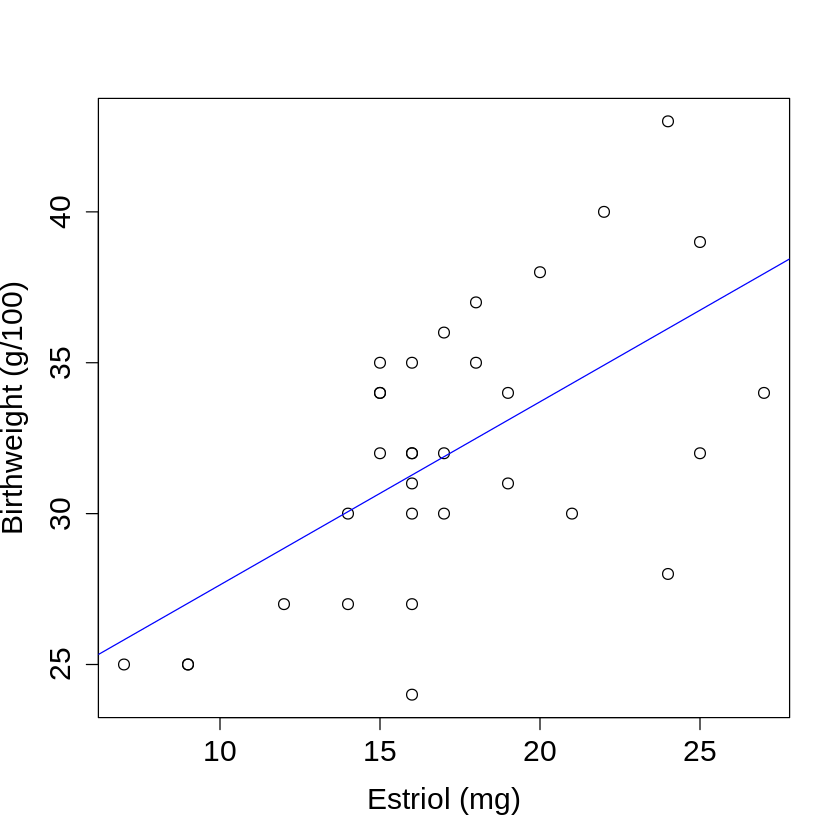

In [5]:
#replot your data from question 1a.
plot(x,y,xlab = 'Estriol (mg)', ylab = 'Birthweight (g/100)' ,
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
abline(a,b, col = "blue") # adds a line on the plot

# <a name="residuals">Residual Plots</a>

---

After we have fit a regression line: $y = a + b x$ and found our coefficients, $a$ and $b$, we can graphically check our residuals (or displacement) values, $d_i$.  If it is a good fit, the residuals should be normally distributed with a mean of zero.   You can also use the residual plot to look for any outliers which can skew your fit values.

- We calculate our residuals with the following equation:

$$d_i = y_i - \hat{y_i}$$

Where $\hat{y_i}$ is the value on the regression line.

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/Residual.png" width="600">



## <a name="71q1d"> Question 1d</a>

---

In the code cell below, you calculate the residuals (or displacement) values from your fit.  Make a scatter plot of $d_i$ versus $x_i$ and overlay a line at y = 0.  Do you think this is a good fit?

### <a name="71sol1d">Solution to  Question 1d</a>

---

<br>

It appears to be a reasonable fit, although at lower x values, there are more points below zero instead of uniformly scattered about zero.


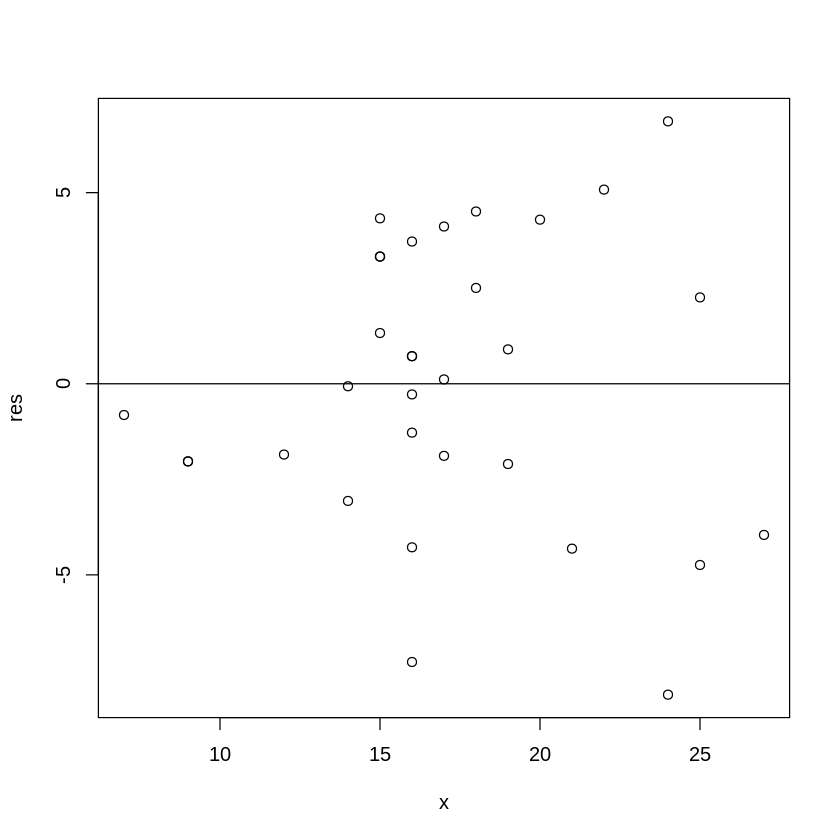

In [8]:
#find the residuals
y_hat = a+b*x
res = y-y_hat

plot(x,res)
abline(0,0)


# <a name="Infer">Inferences about regression parameters</a>

---

The least squares method can fit a line to any set of data points.  But we really want to know in a quantitative manner the answer to the following questions:

- Are the variables dependent?
- How can we calculate the standard deviation and confidence interval for our fit parameters?
- How well does our data fit to a linear model versus another functional relationship (quadratic, exponential, etc)?

We will start to answer this by looking at the variance in our data, $y$, and how much of this variance is attributed to its dependence on the predictor variable, $x$.  

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/RegressionComponents.png" width="300">

We can break down our datapoints $y_i$ into three different deviations from the mean $\bar{y}$.  

- The **residual (or error) component** is $y_i - \hat{y_i}$
- The **regression component** is $\hat{y_i} - \bar{y}$
- The **total component** is $y_i - \bar{y}$

For each of these deviations (total, residual, regression), we can calculate a variance given by the sum of the squares divided by the respective degrees of freedom.

- Total Mean Square = $\frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n-1}$ which is the variance of y.

- Regression Mean Square = $\frac{\sum_{i=1}^{n} (\hat{y_i} - \bar{y})^2}{k}$

- Residual (Error) Mean Square = $\frac{\sum_{i=1}^{n} (y_i - \hat{y_i} )^2}{n-k-1}$

n = the number of observations and k = the number of predictors.  For simple linear regression (y versus x), $k = 1$.

The regression mean square tells how much of the variation in y is due to the predictor x.  The residual mean square tells how much of the variation in y is due to independent effects.  The total mean square is the total amount of variation in y including both dependent and independent effects.

## <a name="71q2"> Question 2</a>

---

The figure below shows scatter plots of different datasets.  In each case, indicate whether the Regression Mean Square (RegMS) is greater than or less than the Residual (Error) Mean Square (MSE).

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/Correlation.png" width="600">

### <a name="71sol2">Solution to  Question 2</a>

---

<br>  
(a) RegMS > MSE

(b) RegMS ~ or < MSE, kind of hard to say without calculating but looks like it could be roughly equal.

(c) RegMS > MSE

(d) RegMS ~ or < MSE

<br>

## <a name="25q3"> Question 3</a>

---

You want to determine if there is a dependence of birthweight on estriol levels using statistics.  To do this, you will use a one-sided F test as discussed in the lecture. In R, you will use these commands for the F-distribution: qf(), pf()

### <a name="25q3a"> Question 3a</a>

---
State the hypotheses and describe in a few sentences.  

#### <a name="25sol3a">Solution to  Question 3a</a>

---

$H_0$: $\beta = 0$

$H_1$: $\beta \neq 0$

The null hypothesis states that there is no dependence of birthweight on estriol levels, so slope is zero.  The alternative states that there is a dependence (slope is not equal to zero).

### <a name="25q3b"> Question 3b</a>

---

Calculate the RegMS and ResidualMS values from your data.

#### <a name="25sol3b">Solution to  Question 3b</a>

---

RegMS = 250.04

MSE = 13.68

In [13]:
# code cell to help with calculations

k = 1
n = length(y)
RegMS = sum((y_hat - y.mean)^2)/k
MSE = sum((y - y_hat)^2)/(n-1)

RegMS
MSE

[1] 250.0372

[1] 13.67622

### <a name="25q3c"> Question 3c</a>

---

Find the test statistic and critical value for a significance level of 5% for your one-sided F test.  Do you accept or reject the null hypothesis.

#### <a name="25sol3c">Solution to  Question 3c</a>

---


F = 18.28

Critical Value = 4.16
<br>
Since F > Critical Value, we reject the null hypothesis and conclude that there is a dependence of birthweight on estriol levels.

In [15]:
#code for calculations

F = RegMS/MSE
F

qf(0.95,k,n-1)

[1] 18.28263

[1] 4.159615

### <a name="25q3d"> Question 3d</a>

---

Calculate the p-value for your test

#### <a name="25sol3c">Solution to  Question 3d</a>

---

p = 0.00017
<br>

In [16]:
#code for your calculations

1-pf(F,k,n-1)

[1] 0.0001687837